## Доверительный интервалы на основе bootstrap

In [4]:
import numpy as np
import pandas as pd

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

In [4]:
data = pd.read_csv("data/verizon.txt", sep="\t")
data.shape

(1687, 2)

In [5]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [6]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

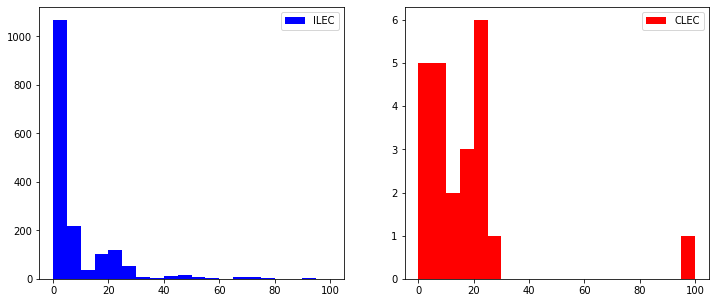

In [12]:
pylab.figure(figsize(12, 5))
pylab.subplot(1, 2, 1)
pylab.hist(data[data.Group == "ILEC"].Time, bins=20, color="b", range=(0, 100), label="ILEC")
pylab.legend()

pylab.subplot(1, 2, 2)
pylab.hist(data[data.Group == "CLEC"].Time, bins=20, color="r", range=(0, 100), label="CLEC")
pylab.legend();

pylab.show()

## Bootstrap

In [19]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [15]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries

### Интервальные оценки медианы

In [17]:
ilec_time = data[data.Group == "ILEC"].Time.values
clec_time = data[data.Group == "CLEC"].Time.values

In [23]:
np.random.seed(0)

ilec_median_scores = [np.median(x) for x in get_bootstrap_samples(ilec_time, 1000)]
clec_median_scores = [np.median(x) for x in get_bootstrap_samples(clec_time, 1000)]

print("95% confidence interval for the ILEC median repair time:", stat_intervals(ilec_median_scores, .05))
print("95% confidence interval for the CLEC median repair time:", stat_intervals(clec_median_scores, .05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


### Точечная оценка разности медиан

In [28]:
print("diff between medians: ", np.median(clec_time) - np.median(ilec_time))

diff between medians:  10.74


### Интервальная оценка разности медиан

In [29]:
delta_median_scores = [x[1] - x[0] for x in zip(ilec_median_scores, clec_median_scores)]

In [31]:
print("diff interval for the difference between medians", stat_intervals(delta_median_scores, .05))

diff interval for the difference between medians [ 2.04975 16.63   ]


### Биномиальные критерии для доли

In [9]:
import numpy as np
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
n = 16 

In [5]:
F_H0 = stats.binom(16, .5)

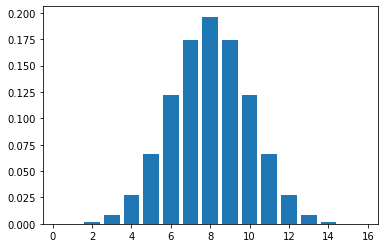

In [9]:
x = np.linspace(0, 16, 17)
pylab.bar(x, F_H0.pmf(x), align="center")
xlim(-.5, 16.5);

### Односторонняя альтернатива
Гипотеа H1: Джеймс Бонд предпочитает взболтанный мартини  
При такой альтернативе более вероятны большие значения статистики; при расчете достигаемого уровня  
значимости будем суммировать высоту столбиков в правом хвосте распределения

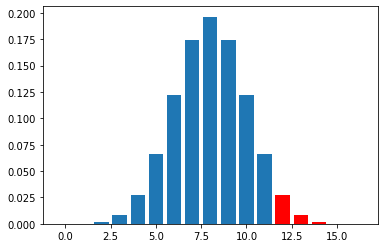

In [20]:
pylab.bar(x, F_H0.pmf(x), align="center")
pylab.bar(np.linspace(12, 16, 5), F_H0.pmf(np.linspace(12, 16, 5)), color="red");

In [38]:
stats.binom_test(12, 16, .5, alternative="greater")

0.0384063720703125

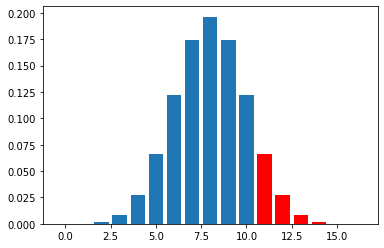

In [24]:
pylab.bar(x, F_H0.pmf(x), align="center")
pylab.bar(np.linspace(11, 16, 6), F_H0.pmf(np.linspace(11, 16, 6)), color="red");

In [25]:
stats.binom_test(11, 16, .5, alternative="greater")

0.1050567626953125

### Двусторонняя альтернатива
Джеймс Бонд предпочитает какой-то определенный вид мартини
При такой альтернативе вероятные очень большие и очень маленькие значения статистики; при расчете достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения

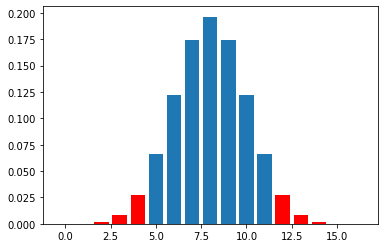

In [26]:
pylab.bar(x, F_H0.pmf(x), align="center")
pylab.bar(np.linspace(12, 16, 5), F_H0.pmf(np.linspace(12, 16, 5)), color="red");
pylab.bar(np.linspace(0, 4 , 5), F_H0.pmf(np.linspace(0, 4 , 5)), color="red");

In [35]:
stats.binom_test(12, n=16, p=.5, alternative="two-sided")

0.076812744140625

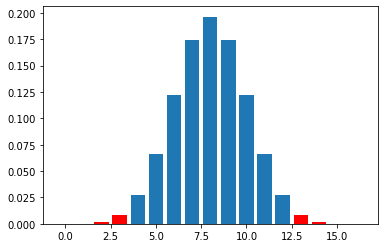

In [29]:
pylab.bar(x, F_H0.pmf(x), align="center")
pylab.bar(np.linspace(13, 16, 4), F_H0.pmf(np.linspace(13, 16, 4)), color="red");
pylab.bar(np.linspace(0, 3, 4), F_H0.pmf(np.linspace(0, 3, 4)), color="red");

In [39]:
stats.binom_test(13, n=16, p=.5, alternative="two-sided")

0.021270751953125

### Критерий Пирсона

#### Исчерпанная рождаемость
выборка - целочисленный вектор длины n, характеризующий количество детей у опрашиваемой женщины  
гипотеза H0 - рассматриваемая величина имеет распределение пуассона

In [1]:
import pandas as pd

In [2]:
fin = pd.read_csv("./data/fertility.txt", header=None)

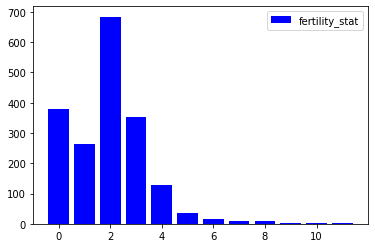

In [6]:
pylab.bar(range(12), np.bincount(fin.values.ravel()), color="b", label="fertility_stat")
pylab.legend();

In [16]:
l = np.mean(fin)
l

0    1.937167
dtype: float64

### Критерий согласия 

In [12]:
data = list(fin.values.ravel().astype(int))
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1],
      dtype=int64)

In [28]:
np.bincount(data) / len(data)

array([0.20181044, 0.13951012, 0.36421725, 0.18796592, 0.06815761,
       0.01863685, 0.0085197 , 0.00425985, 0.00532481, 0.00053248,
       0.00053248, 0.00053248])

In [17]:
expected_frequences = [len(data) * stats.poisson.pmf(x, l)[0] for x in range(min(data), max(data) + 1)]

In [95]:
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

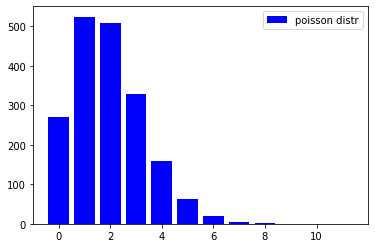

In [30]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color="b", label="poisson distr")
pylab.legend();

In [50]:
stats.chisquare(observed_frequences, expected_frequences, ddof=1)

Power_divergenceResult(statistic=415.2920720688844, pvalue=5.223503735094445e-83)

In [46]:
observed_frequences.sum()

1878

In [48]:
observed_frequences.sum() - sum()

0.0018502662971968675

In [49]:
expected_frequences[-1] += 0.0018502662971968675
